<a href="https://colab.research.google.com/github/codetitan9999/Sentiment-Analysis-Python/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This a Sentiment Analysis program that parses the tweets fetched from Twitter using Python

# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [ ]:
log = pd.read_csv('login.csv')

In [ ]:
APIConsumerKey = log['key'][2]
APIConsumerKeySecret = log['key'][3]
AccessToken = log['key'][1]
AccessTokenSecret = log['key'][0]

In [ ]:
authenticate = tweepy.OAuthHandler(APIConsumerKey, APIConsumerKeySecret)
authenticate.set_access_token(AccessToken, AccessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [ ]:
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode = "extended")
print("Show the 5 recent tweets : \n")
for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

Show the 5 recent tweets : 

RT @_HannahRitchie: 99% of the Indian population has access to electricity.

In 2000, this was just 59%. Even in 2010, just 76%.

A massive…

I spent the morning in DC celebrating 20 years of @PEPFAR which has helped save more than 25 million lives, and is one of the most generous initiatives America has ever led. https://t.co/pEgJyUbCQs

Recent Alzheimer’s breakthroughs like lecanemab will spark new and increased investment in brain health — giving hope that we’ll someday soon be able to substantially alter the course of the disease and ones like it. https://t.co/szd2m8nuDj

India gives me hope for the future. I’m excited to visit next week and see the work being done by innovators and entrepreneurs to tackle big challenges like climate change, health, and hunger. https://t.co/vnVpLNROtZ

RT @Breakthrough: At #MSC2023, BE joined @Siemens_Energy, @vonderleyen, @wernerhoyer, @fbirol &amp; others to launch the Energy Resilience Lead…



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,RT @_HannahRitchie: 99% of the Indian populati...
1,I spent the morning in DC celebrating 20 years...
2,Recent Alzheimer’s breakthroughs like lecanema...
3,India gives me hope for the future. I’m excite...
4,"RT @Breakthrough: At #MSC2023, BE joined @Siem..."


In [ ]:
#clean the text
#clean the text

#create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '' ,text)        #remove @mentions
  text = re.sub(r'#', '', text)                    #remove '#' symbol
  text = re.sub(r'RT[\s]+', '', text)              #remove RT
  text = re.sub(r'https?:\/\/\S+', '', text)       #remove hyper link

  return text

#cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)
#show the cleaned text
df

  

,Tweets
0,@_HannahRitchie: 99% of the Indian population ...
1,I spent the morning in DC celebrating 20 years...
2,Recent Alzheimer’s breakthroughs like lecanema...
3,India gives me hope for the future. I’m excite...
4,": At MSC2023, BE joined _Energy, , , &amp; ot..."
...,...
95,I was truly lucky to know Ric Weiland. He was ...
96,"Over the years, I’ve come to know Bono as an i..."
97,Thanks for dedicating your career to keeping t...
98,The world can end this pandemic while also pre...


In [ ]:
# Create a function to get the subjectivity 

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns

df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataFrame with the new columns
df

,Tweets,subjectivity,polarity
0,@_HannahRitchie: 99% of the Indian population ...,0.000000,0.000000
1,I spent the morning in DC celebrating 20 years...,0.366667,0.300000
2,Recent Alzheimer’s breakthroughs like lecanema...,0.443182,0.212121
3,India gives me hope for the future. I’m excite...,0.243750,0.093750
4,": At MSC2023, BE joined _Energy, , , &amp; ot...",0.000000,0.000000
...,...,...,...
95,I was truly lucky to know Ric Weiland. He was ...,0.783333,0.475000
96,"Over the years, I’ve come to know Bono as an i...",0.591667,0.425000
97,Thanks for dedicating your career to keeping t...,0.200000,0.200000
98,The world can end this pandemic while also pre...,0.319444,-0.119444


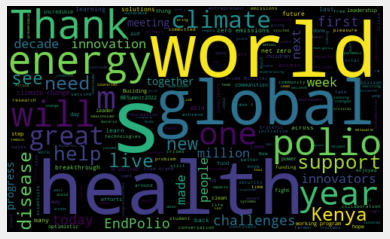

In [ ]:
#Plot the Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative neutral and positive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['polarity'].apply(getAnalysis)
df

,Tweets,subjectivity,polarity,Analysis
0,@_HannahRitchie: 99% of the Indian population ...,0.000000,0.000000,Neutral
1,I spent the morning in DC celebrating 20 years...,0.366667,0.300000,Positive
2,Recent Alzheimer’s breakthroughs like lecanema...,0.443182,0.212121,Positive
3,India gives me hope for the future. I’m excite...,0.243750,0.093750,Positive
4,": At MSC2023, BE joined _Energy, , , &amp; ot...",0.000000,0.000000,Neutral
...,...,...,...,...
95,I was truly lucky to know Ric Weiland. He was ...,0.783333,0.475000,Positive
96,"Over the years, I’ve come to know Bono as an i...",0.591667,0.425000,Positive
97,Thanks for dedicating your career to keeping t...,0.200000,0.200000,Positive
98,The world can end this pandemic while also pre...,0.319444,-0.119444,Negative


In [ ]:
# Create all of the positive tweets
k = 1
sortedDf = df.sort_values(by = ['polarity'], ascending = False)
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['Analysis'][i] == 'Positive'):
    print(str(k) + ')' + sortedDf['Tweets'][i])
    print()
    k = k + 1


1)I spent the morning in DC celebrating 20 years of  which has helped save more than 25 million lives, and is one of the most generous initiatives America has ever led. 

2)Recent Alzheimer’s breakthroughs like lecanemab will spark new and increased investment in brain health — giving hope that we’ll someday soon be able to substantially alter the course of the disease and ones like it. 

3)India gives me hope for the future. I’m excited to visit next week and see the work being done by innovators and entrepreneurs to tackle big challenges like climate change, health, and hunger. 

4). and I were interviewed by an AI chatbot and had a great conversation about the future. Spoiler alert: it’s bright. 

5)I enjoyed speaking in Oslo about the interlinked challenges of energy, health, and food security and the way forward in this time of crisis. 

6)Norway has been a great supporter of global health in low-income communities through ODA contributions. It was great to connect with  on this. 

In [ ]:
# Create all of the negative tweets
k = 1
sortedDf = df.sort_values(by = ['polarity'], ascending = False)
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['Analysis'][i] == 'Negative'):
    print(str(k) + ')' + sortedDf['Tweets'][i] + str(df['polarity'][i]))
    print()
    k = k + 1


1): As of 2022, 47 countries have eliminated at least one neglected tropical disease (NTDs).

A new report from  shows…-0.08181818181818182

2)Collaboration and more open access to data have made seemingly impossible health breakthroughs a reality, like COVID-19 vaccines.  is putting the power of data behind one of our most critical health challenges. -0.011111111111111108

3)I have never met anyone who was more passionate about reducing the world’s worst inequities in health than Paul Farmer. I continue to learn from my dear friend’s life and legacy today. -0.18333333333333335

4)  It’s unrealistic to expect people to stop traveling by plane. We must scale innovations that decarbonize the aviation industry.  will help us achieve this by building the world’s first plant for turning alcohol into sustainable aviation fuel. -0.125

5)Last week, I sat down with Bloomberg  to talk about why I remain so committed to eradicating polio. By coming together and funding efforts like the Global Po

In [ ]:
# Create all of the neutral tweets
k = 1
sortedDf = df.sort_values(by = ['polarity'], ascending = False)
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['Analysis'][i] == 'Neutral'):
    print(str(k) + ')' + sortedDf['Tweets'][i] + str(df['polarity'][i]))
    print()
    k = k + 1


1)@_HannahRitchie: 99% of the Indian population has access to electricity.

In 2000, this was just 59%. Even in 2010, just 76%.

A massive…0.0

2): At MSC2023, BE joined _Energy, , ,  &amp; others to launch the Energy Resilience Lead…0.0

3)The world is facing multiple crises around energy, food and health. These threats are interconnected and require a joined-up response, prioritizing global cooperation and innovation. 0.0

4)CRISPR has revolutionized health over the past decade. I’m excited to see how it will continue to evolve and intersect with other technologies in the decade to come. 0.0

5)Aside from being a neat piece of art, the periodic table reminds me of how one discovery can lead to countless others. 0.0

6)Thank you for your support and continued leadership. 0.0

7)It was a pleasure to speak at the Lowy Institute about how climate change is inextricably linked with health, food, and energy security. These must be addressed together with an understanding about how each one

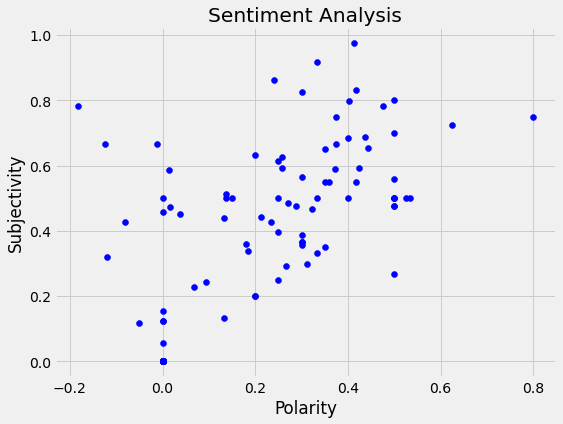

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
# Get the percentage of the positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)


68.0

In [ ]:
# Get the percentage of the negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

6.0

In [ ]:
# Get the percentage of the neutral tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

26.0

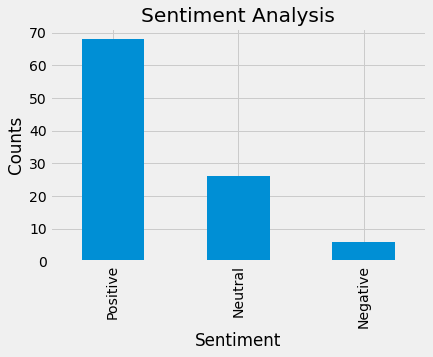

In [ ]:
# Show the value Counts

df['Analysis'].value_counts()

# Plot and visualize the count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()